This notebook will be used to look at plots from the nowcast_green runs

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import viz_tools

%matplotlib inline

Loading nowcast_green results

In [3]:
filename = '/results/SalishSea/nowcast-green/22jan16/SalishSea_1d_20160122_20160122_ptrc_T.nc'
grid_g = nc.Dataset(filename)
thalweg = np.loadtxt('../../Tools/bathymetry/thalweg_working.txt', dtype=int, unpack=True)

In [4]:
vnames=grid_g.variables.keys()
print(vnames)
excluded={'nav_lat', 'nav_lon', 'deptht', 'time_centered', 'time_centered_bounds','deptht_bounds',
          'time_counter','time_counter_bounds'}
vnames=[x for x in vnames if x not in excluded]
print(vnames)

KeysView(OrderedDict([('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T
unlimited dimensions: 
current shape = (898, 398)
filling off
), ('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T
unlimited dimensions: 
current shape = (898, 398)
filling off
), ('deptht', <class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    long_name: Vertical T levels
    units: m
    axis: Z
    positive: down
    bounds: deptht_bounds
unlimited dimensions: 
current shape = (40,)
filling off
), ('deptht_bounds', <class 'netCDF4._netCDF4.Variable'>
float32 deptht_bounds(deptht, axis_nbounds)
unlimited dimensions: 
current shape = (40, 2)
filling off
), ('NO3', <class 'netCDF4._netCDF4.Variable'>
float32 NO3(time_counter, deptht, y, x)
    long_name: Nitrate Concentra

Pre-load and set some variable

In [5]:
zlevels = grid_g.variables['deptht'][:]
x, z = np.meshgrid(np.arange(thalweg.shape[1]), zlevels)

## Make surface and thalweg plots for all fields

In [6]:
def plot_surface_thalweg(grid_g, thalweg, x, z, field):
    """ """
    
    conc = grid_g.variables[field]
    
    #Prepare surface values
    conc_ma = np.ma.masked_values(conc[0, 0, :, :], 0)
    # use tmask (meshmask file) instead
    vmin = np.min(conc_ma)
    vmax = np.max(conc_ma)
   
    #Prepare thalweg values
    npconc = conc[:]
    conc_t = npconc[0, :, thalweg[0], thalweg[1]]
    conc_t_ma = np.ma.masked_values(conc_t, 0)
    vmin_t = np.min(conc_t_ma)
    vmax_t = np.max(conc_t_ma)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    land_colour = 'burlywood'
    for ax in (ax2, ax1):
        ax.set_axis_bgcolor(land_colour)
    ax1.set_position((0.125, 0.125, 0.5, 0.775))
    ax2.set_position((0.8, 0.125, 0.2, 0.775))
    
    viz_tools.set_aspect(ax2)
    cmap = plt.get_cmap('Greens')
    cmap.set_bad('burlywood')
    
    #Surface plot
    mesh = ax2.pcolormesh(conc_ma, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = fig.colorbar(mesh, ax=ax2)
    ax2.set_title('Surface {label}'.format(label=conc.long_name.title()), fontsize=16)
    ax2.set_xlabel('x Index')
    ax2.set_ylabel('y Index')
    cbar.set_label('{label} [{units}]'.format(label=conc.long_name.title(), units=conc.units))
    
    #Thalweg
    mesh = ax1.pcolormesh(x, z, conc_t_ma.T, cmap=cmap, vmin=vmin_t, vmax=vmax_t)
    ax1.invert_yaxis()
    ax1.set_xlim(0, thalweg[0][-1])
    ax1.set_title('{label} along Thalweg'.format(label=conc.long_name.title()), fontsize=16)
    ax1.set_xlabel('x Index', fontsize=14)
    ax1.set_ylabel('Depth (m)', fontsize=14)
    return fig

1 loops, best of 1: 1min 3s per loop


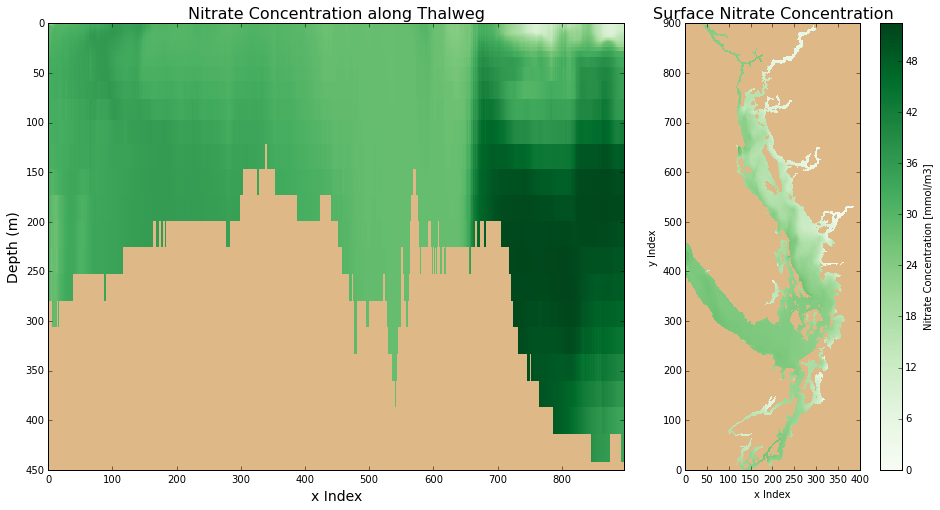

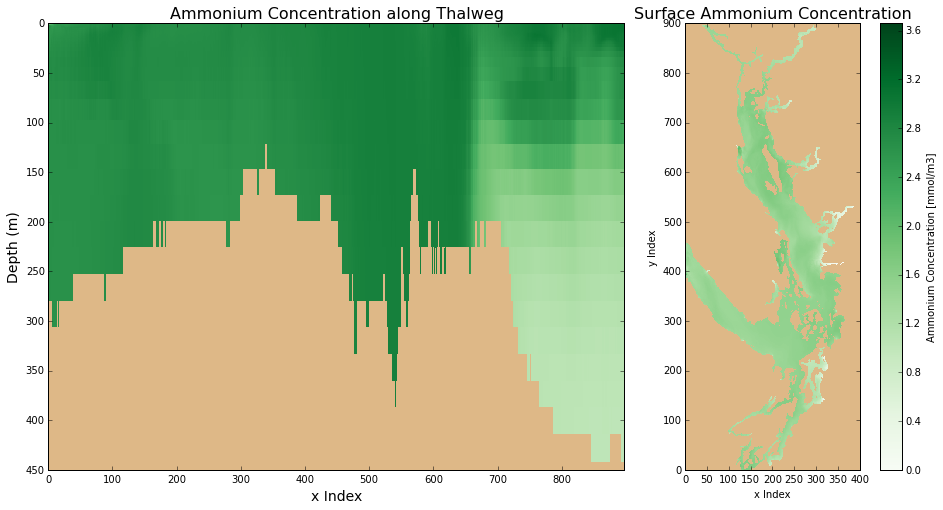

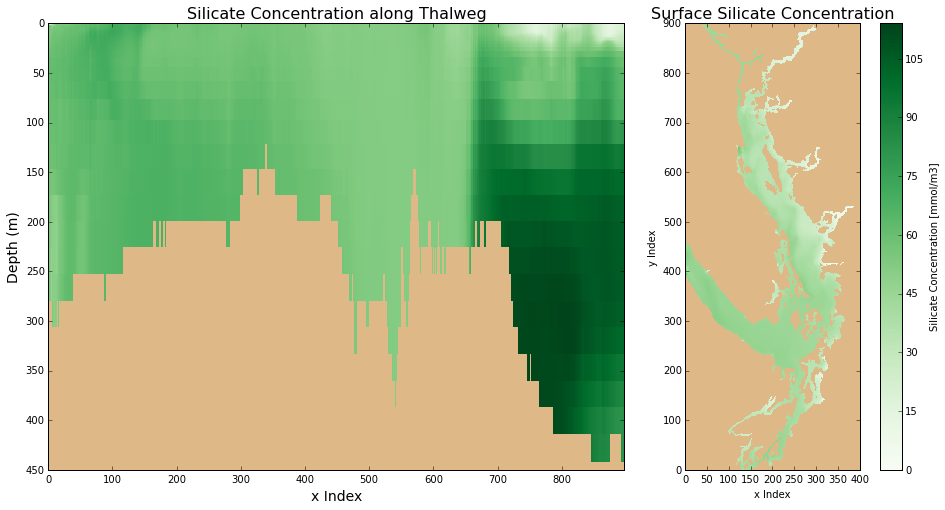

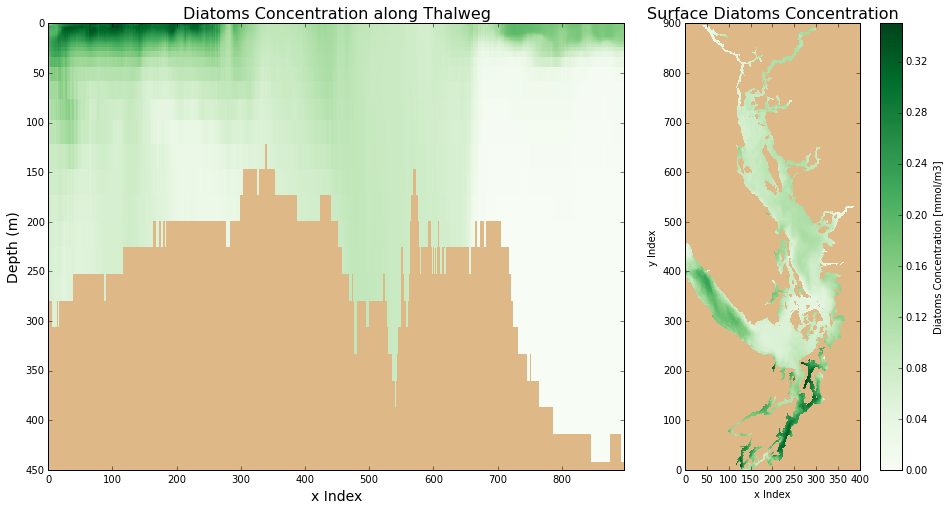

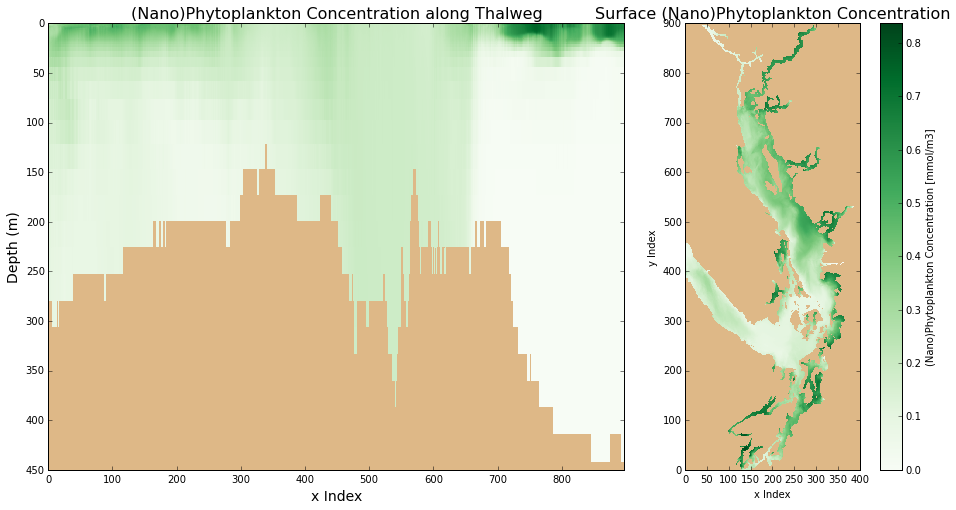

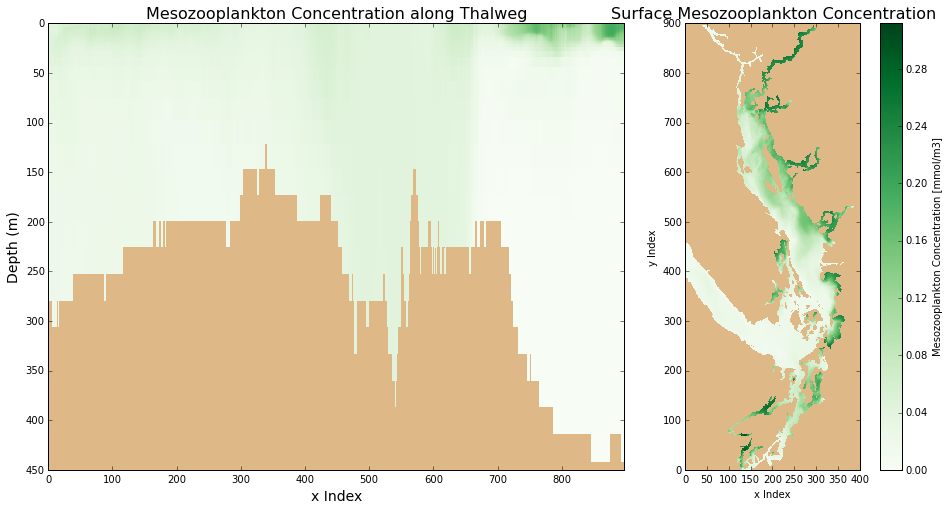

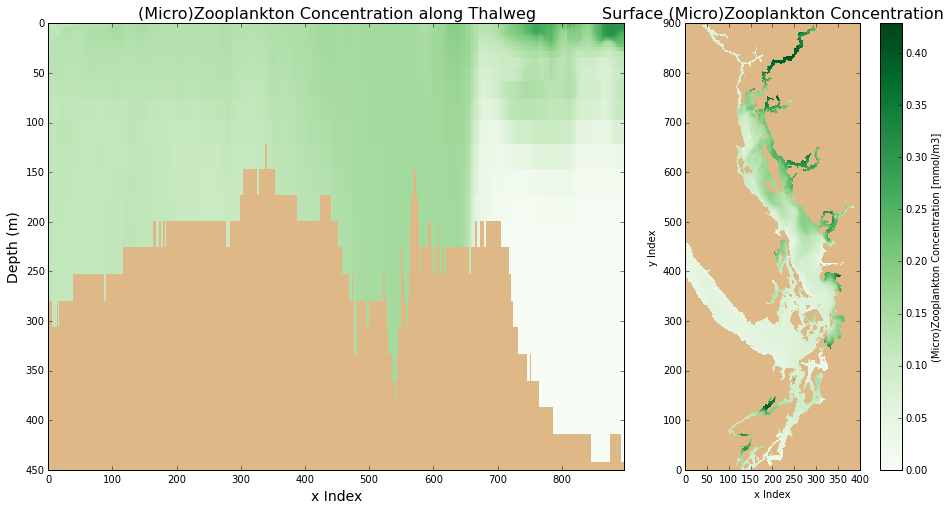

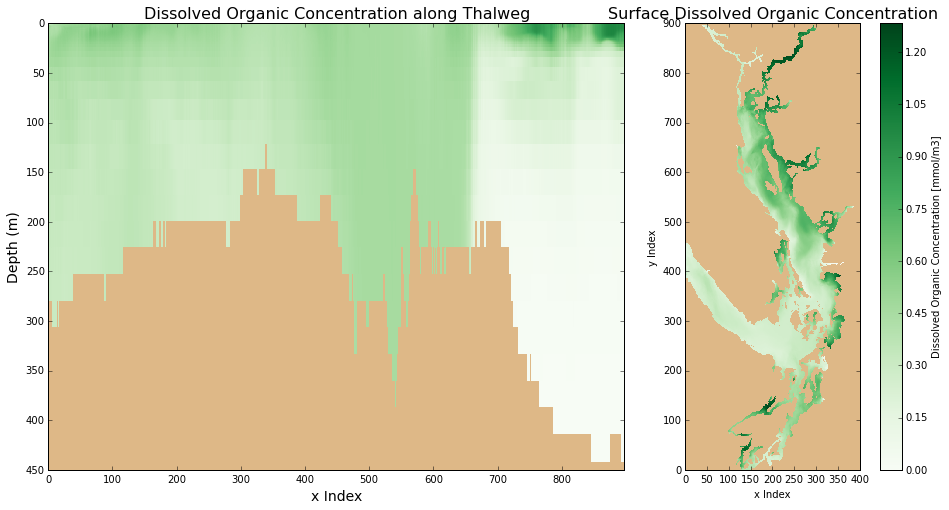

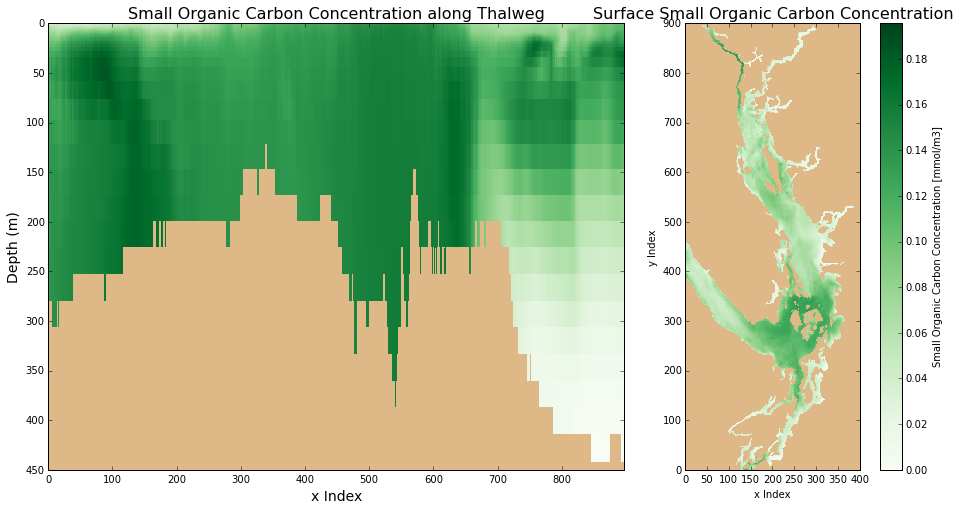

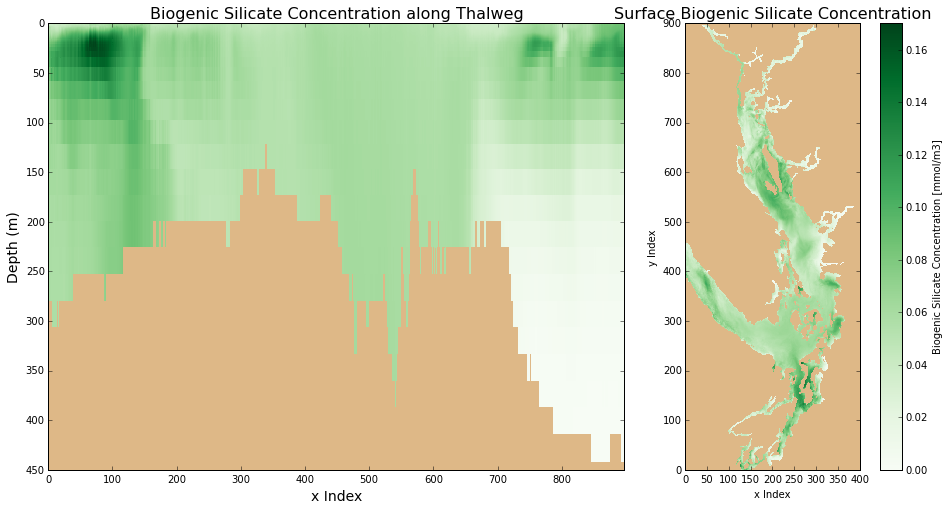

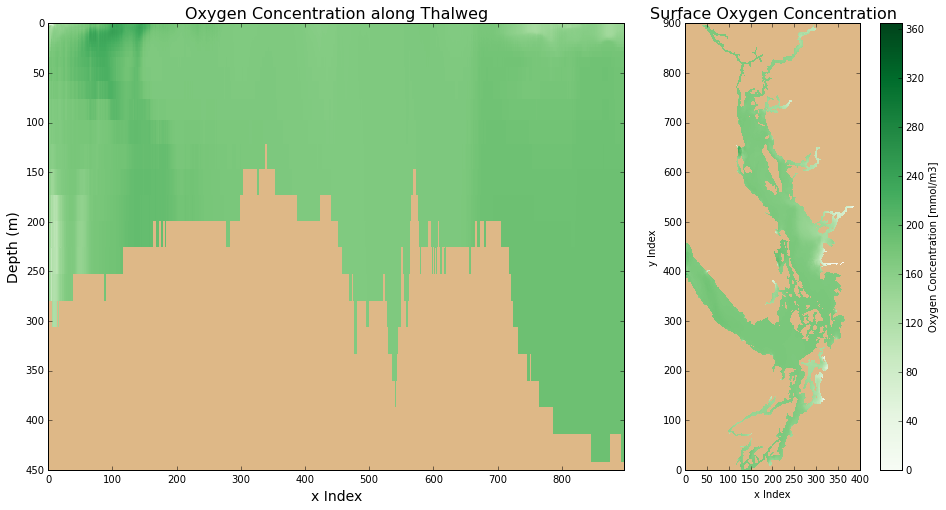

In [7]:
%%timeit -n1 -r1
#var = ('NO3', 'NH4', 'Si', 'PHY', 'PHY2', 'MYRI', 'MICZ', 'DOC', 'POC', 'bSi', 'O2')
for field in vnames:
    plot_surface_thalweg(grid_g, thalweg, x, z, field)